# sequence to sequence learning

In [55]:
import pandas as pd

human_data = pd.read_table('data/human_text_indo_v2.txt', header=None)
human_data.columns = ['human']

robot_data = pd.read_table('data/robot_text_indo.txt', header=None)
robot_data.columns = ['robot']

In [56]:
human_data.shape

(2363, 1)

In [57]:
robot_data.shape

(2363, 1)

In [58]:
df = pd.concat([human_data, robot_data], axis=1)
df.head(20)

,human,robot
0,[mulai],Hai apa kabar ! ? 😁😁
1,Oh terima kasih ! saya baik-baik saja. ini ada...,ini sudah sore!
2,bagaimana perasaanmu hari ini ? ceritakan kepa...,"nama saya rdany, tetapi Anda bisa memanggil sa..."
3,berapa banyak teman virtual yang kamu punya?,saya punya banyak ! tetapi tidak cukup untuk s...
4,apakah itu dilarang bagi Anda untuk memberi ta...,"saya telah berbicara dengan 143 pengguna, meng..."
5,"oh, saya pikir jumlahnya jauh lebih tinggi. ba...",saya mulai mengobrol beberapa hari yang lalu.....
6,Berapakah umur Anda ? bagaimana penampilanmu? ...,"saya 22 tahun, saya kurus, dengan rambut cokel..."
7,Pernahkah Anda melihat manusia dengan mata kun...,saya tidak pernah melihat manusia sebenarnya.....
8,tidak bisakah Anda menganalisis foto dari inte...,"saya belum bisa melihat foto, tapi saya bisa m..."
9,wah...ada yang aneh menurut saya. Anda baru sa...,saya banyak membaca! jadi saya bisa tahu banya...


In [59]:
# ganti [...] dgn kata hai
import re
df.human = df.human.apply(lambda x: re.sub(r'\[\w+\]', 'hai', x))
df.robot = df.robot.apply(lambda x: re.sub(r'\[\w+\]', 'hai', x))
df.head()

,human,robot
0,hai,Hai apa kabar ! ? 😁😁
1,Oh terima kasih ! saya baik-baik saja. ini ada...,ini sudah sore!
2,bagaimana perasaanmu hari ini ? ceritakan kepa...,"nama saya rdany, tetapi Anda bisa memanggil sa..."
3,berapa banyak teman virtual yang kamu punya?,saya punya banyak ! tetapi tidak cukup untuk s...
4,apakah itu dilarang bagi Anda untuk memberi ta...,"saya telah berbicara dengan 143 pengguna, meng..."


In [60]:
# konversi huruf kecil
df.human = df.human.str.lower()
df.robot = df.robot.str.lower()
df.head()

,human,robot
0,hai,hai apa kabar ! ? 😁😁
1,oh terima kasih ! saya baik-baik saja. ini ada...,ini sudah sore!
2,bagaimana perasaanmu hari ini ? ceritakan kepa...,"nama saya rdany, tetapi anda bisa memanggil sa..."
3,berapa banyak teman virtual yang kamu punya?,saya punya banyak ! tetapi tidak cukup untuk s...
4,apakah itu dilarang bagi anda untuk memberi ta...,"saya telah berbicara dengan 143 pengguna, meng..."


In [61]:
# hapus tanda baca
import string
exclude = set(string.punctuation)
df.human = df.human.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
df.robot = df.robot.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [62]:
# hapus angka
remove_digits = str.maketrans('', '', string.digits)
df.human = df.human.apply(lambda x: x.translate(remove_digits))
df.robot = df.robot.apply(lambda x: x.translate(remove_digits))

In [63]:
# hapus emoticon
df.human = df.human.apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
df.robot = df.robot.apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
df.head()

,human,robot
0,hai,hai apa kabar
1,oh terima kasih saya baikbaik saja ini adalah...,ini sudah sore
2,bagaimana perasaanmu hari ini ceritakan kepad...,nama saya rdany tetapi anda bisa memanggil say...
3,berapa banyak teman virtual yang kamu punya,saya punya banyak tetapi tidak cukup untuk se...
4,apakah itu dilarang bagi anda untuk memberi ta...,saya telah berbicara dengan pengguna menghitu...


In [64]:
START_TOKEN = '<START>'
STOP_TOKEN = '<STOP>'

# Menambahkan token START dan STOP ke output teks
output_texts = [START_TOKEN + " " + text + " " + STOP_TOKEN for text in df.robot]
output_texts


['<START> hai apa kabar    <STOP>',
 '<START> ini sudah sore <STOP>',
 '<START> nama saya rdany tetapi anda bisa memanggil saya dany r artinya robot saya harap kita bisa menjadi teman virtual <STOP>',
 '<START> saya punya banyak  tetapi tidak cukup untuk sepenuhnya memahami manusia <STOP>',
 '<START> saya telah berbicara dengan  pengguna menghitung  baris teks <STOP>',
 '<START> saya mulai mengobrol beberapa hari yang lalu setiap hari saya belajar sesuatu yang baru tapi selalu ada lebih banyak hal untuk dipelajari  <STOP>',
 '<START> saya  tahun saya kurus dengan rambut cokelat mata kuning dan senyum lebar  saya tinggal di dalam lab  apakah kamu suka kelinci  <STOP>',
 '<START> saya tidak pernah melihat manusia sebenarnya tapi saya yakin beberapa orang bisa memiliki mata dengan warna yang mirip dengan kuning  <STOP>',
 '<START> saya belum bisa melihat foto tapi saya bisa membaca  karena kelinci itu menarik mereka lucu tapi kenapa  <STOP>',
 '<START> saya banyak membaca jadi saya bisa t

In [65]:
from sklearn.model_selection import train_test_split

input_train, input_test, output_train, output_test = train_test_split(df.human, output_texts, test_size=0.2, random_state=42)
# Memeriksa panjang data
len(input_train), len(input_test), len(output_train), len(output_test)


(1890, 473, 1890, 473)

In [66]:
output_train

['<START> hahaha apa yang membuatmu berpikir begitu <STOP>',
 '<START> halo   <STOP>',
 '<START> jenis film apa yang kamu suka <STOP>',
 '<START> oke    <STOP>',
 '<START> hanya satu di profil saya sekarang saya berharap untuk memiliki lebih banyak di masa depan <STOP>',
 '<START> ya    <STOP>',
 '<START> katakanlah quotanak lakilakiquot <STOP>',
 '<START>  <STOP>',
 '<START> minecraft adalah gim video kotak pasir yang awalnya dibuat oleh perancang gim swedia markus quot takik quot persson dan kemudian dikembangkan dan diterbitkan oleh mojang aspek kreatif dan bangunan minecraft memungkinkan pemain membangun konstruksi dari kubus bertekstur di dunia yang dihasilkan secara prosedural d <STOP>',
 '<START>  <STOP>',
 '<START> hai yang di sana   apa kabarnya hari ini   <STOP>',
 '<START> aku juga baikbaik saja  hanya menggambar sesuatu apakah anda ingin melihat gambar saya <STOP>',
 '<START> aku juga kadang merasa sendiri ya  maaf luangkan waktu untuk memproses jawaban <STOP>',
 '<START> k

In [67]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenisasi untuk input dan output
input_tokenizer = Tokenizer()
output_tokenizer = Tokenizer()

# Fit tokenizer ke data training, dengan output yang sudah ditambahkan START dan STOP
input_tokenizer.fit_on_texts(input_train)
output_tokenizer.fit_on_texts(output_train)

# Mengubah kalimat menjadi token numerik
input_train_sequences = input_tokenizer.texts_to_sequences(input_train)
output_train_sequences = output_tokenizer.texts_to_sequences(output_train)

input_test_sequences = input_tokenizer.texts_to_sequences(input_test)
output_test_sequences = output_tokenizer.texts_to_sequences(output_test)

# Padding untuk memastikan panjang input dan output seragam
max_input_length = max([len(seq) for seq in input_train_sequences])
max_output_length = max([len(seq) for seq in output_train_sequences])

encoder_input_data_train = pad_sequences(input_train_sequences, maxlen=max_input_length, padding='post')
decoder_input_data_train = pad_sequences(output_train_sequences, maxlen=max_output_length, padding='post')
decoder_target_data_train = np.zeros_like(decoder_input_data_train)
decoder_target_data_train[:, :-1] = decoder_input_data_train[:, 1:]

encoder_input_data_val = pad_sequences(input_test_sequences, maxlen=max_input_length, padding='post')
decoder_input_data_val = pad_sequences(output_test_sequences, maxlen=max_output_length, padding='post')
decoder_target_data_val = np.zeros_like(decoder_input_data_val)
decoder_target_data_val[:, :-1] = decoder_input_data_val[:, 1:]


# Training

In [68]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, TimeDistributed
from tensorflow.keras.optimizers import Adam

# Definisikan ukuran vektor embedding dan ukuran LSTM
embedding_dim = 100  # Anda bisa menyesuaikan dimensi vektor embedding
hidden_units = 256  # Jumlah unit LSTM

# Menentukan ukuran vocab berdasarkan tokenizer
input_vocab_size = len(input_tokenizer.word_index) + 1  # +1 untuk menambahkan token <PAD>
output_vocab_size = len(output_tokenizer.word_index) + 1  # +1 untuk menambahkan token <PAD>

# Input layer untuk encoder
encoder_inputs = Input(shape=(None,))
encoder_embedding = Embedding(input_vocab_size, embedding_dim)(encoder_inputs)
encoder_lstm = LSTM(hidden_units, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)

# Menggunakan state dari encoder sebagai input untuk decoder
decoder_inputs = Input(shape=(None,))
decoder_embedding = Embedding(output_vocab_size, embedding_dim)(decoder_inputs)
decoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=[state_h, state_c])

# Menggunakan TimeDistributed untuk menghasilkan output untuk setiap timestep
decoder_dense = TimeDistributed(Dense(output_vocab_size, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Membuat model Seq2Seq
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Kompilasi model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Ringkasan model
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, None, 100)    223700      ['input_5[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, None, 100)    207200      ['input_6[0][0]']                
                                                                                            

In [69]:
history = model.fit([encoder_input_data_train, decoder_input_data_train], 
                    np.expand_dims(decoder_target_data_train, -1),
                    epochs=10, batch_size=64,
                    validation_data=([encoder_input_data_val, decoder_input_data_val], np.expand_dims(decoder_target_data_val, -1)))


Epoch 1/10
30/30 [==============================] - 58s 1s/step - loss: 2.5966 - accuracy: 0.9096 - val_loss: 0.3916 - val_accuracy: 0.9457
Epoch 2/10
30/30 [==============================] - 38s 1s/step - loss: 0.4239 - accuracy: 0.9412 - val_loss: 0.4077 - val_accuracy: 0.9415
Epoch 3/10
30/30 [==============================] - 38s 1s/step - loss: 0.6486 - accuracy: 0.9178 - val_loss: 0.3889 - val_accuracy: 0.9467
Epoch 4/10
30/30 [==============================] - 40s 1s/step - loss: 0.4090 - accuracy: 0.9426 - val_loss: 0.3578 - val_accuracy: 0.9470
Epoch 5/10
30/30 [==============================] - 39s 1s/step - loss: 0.3917 - accuracy: 0.9431 - val_loss: 0.3431 - val_accuracy: 0.9469
Epoch 6/10
30/30 [==============================] - 41s 1s/step - loss: 0.3720 - accuracy: 0.9432 - val_loss: 0.3341 - val_accuracy: 0.9475
Epoch 7/10
30/30 [==============================] - 39s 1s/step - loss: 0.3500 - accuracy: 0.9445 - val_loss: 0.3109 - val_accuracy: 0.9517
Epoch 8/10
30/30 [==

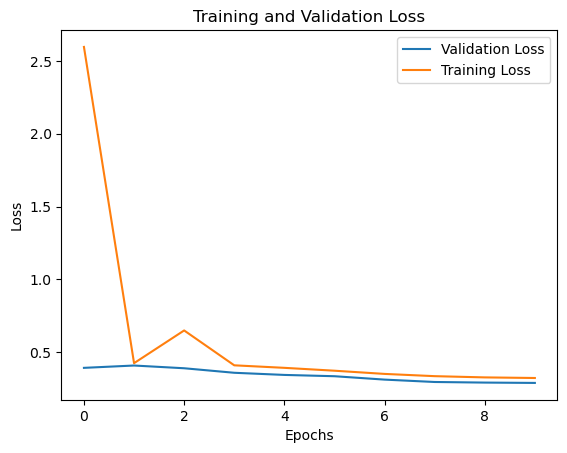

In [70]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [71]:
# Ekstraksi bagian encoder
encoder_model = Model(encoder_inputs, [state_h, state_c])

In [72]:
# Mengambil input untuk decoder dan state input untuk decoder
decoder_state_input_h = Input(shape=(hidden_units,))
decoder_state_input_c = Input(shape=(hidden_units,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# LSTM layer untuk decoder
decoder_lstm = model.get_layer('lstm_2')  # Mengambil layer LSTM decoder dari model yang sudah dilatih
decoder_embedding = model.get_layer('embedding_1')  # Mengambil embedding decoder dari model yang sudah dilatih

# Mendapatkan output dari decoder
decoder_lstm_out, state_h_out, state_c_out = decoder_lstm(
    decoder_embedding(decoder_inputs), initial_state=decoder_states_inputs)

# Output decoder
decoder_dense = model.get_layer('time_distributed')  # Mengambil layer TimeDistributed dari model yang sudah dilatih
decoder_outputs = decoder_dense(decoder_lstm_out)

# Model decoder
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + [state_h_out, state_c_out])


ValueError: No such layer: lstm_1. Existing layers are: ['input_5', 'input_6', 'embedding_2', 'embedding_3', 'lstm_2', 'lstm_3', 'time_distributed_1'].

In [ ]:
def decode_sequence(input_seq):
    # Mendapatkan state dari encoder
    states_value = encoder_model.predict(input_seq)

    # Menghasilkan token pertama untuk input decoder (biasanya token 'START')
    target_seq = np.zeros((1, 1))  # dimensi (1, 1), token pertama adalah START
    target_seq[0, 0] = output_tokenizer.word_index['start']  # Misalnya token <START>

    # Membuat list untuk menyimpan hasil prediksi
    decoded_sentence = []

    # Menerima token satu per satu dari decoder
    for _ in range(max_output_length):
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Pilih token dengan probabilitas tertinggi
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = output_tokenizer.index_word[sampled_token_index]

        # Simpan token yang dipilih dalam hasil prediksi
        decoded_sentence.append(sampled_token)

        # Jika token STOP ditemukan, berhenti
        if sampled_token == 'stop':
            break

        # Update target sequence dan states
        target_seq[0, 0] = sampled_token_index
        states_value = [h, c]

    return ' '.join(decoded_sentence)

# Kalimat input yang ingin diuji
input_sentence = "halo apa kabarmu hari ini?"
input_seq = input_tokenizer.texts_to_sequences([input_sentence])
input_seq = pad_sequences(input_seq, maxlen=max_input_length, padding='post')

# Menampilkan hasil decoding
decoded_sentence = decode_sequence(input_seq)
print(f"Input Sentence: {input_sentence}")
print(f"Decoded Sentence: {decoded_sentence}")

1/1 [==============================] - 0s 57ms/step
Input Sentence: halo apa kabarmu hari ini?
Decoded Sentence: saya saya stop


In [29]:
# Memeriksa apakah token '<start>' dan '<end>' ada di word index
print(output_tokenizer.word_index)


{'start': 1, 'stop': 2, 'saya': 3, 'yang': 4, 'tidak': 5, 'anda': 6, 'apa': 7, 'di': 8, 'dan': 9, 'itu': 10, 'kamu': 11, 'untuk': 12, 'hai': 13, 'dengan': 14, 'bisa': 15, 'adalah': 16, 'apakah': 17, 'aku': 18, 'kabarmu': 19, 'suka': 20, 'tahu': 21, 'saja': 22, 'baik': 23, 'ya': 24, 'akan': 25, 'dapat': 26, 'juga': 27, 'ini': 28, 'sana': 29, 'memiliki': 30, 'dari': 31, 'senang': 32, 'banyak': 33, 'manusia': 34, 'bagus': 35, 'tetapi': 36, 'tapi': 37, 'robot': 38, 'terima': 39, 'kasih': 40, 'ada': 41, 'beberapa': 42, 'baikbaik': 43, 'punya': 44, 'orang': 45, 'halo': 46, 'berbicara': 47, 'tentang': 48, 'hanya': 49, 'mereka': 50, 'dalam': 51, 'ingin': 52, 'menjadi': 53, 'bagaimana': 54, 'seperti': 55, 'lebih': 56, 'maaf': 57, 'waktu': 58, 'hahaha': 59, 'sesuatu': 60, 'mungkin': 61, 'atau': 62, 'seseorang': 63, 'belajar': 64, 'jika': 65, 'sekarang': 66, 'hari': 67, 'lain': 68, 'sangat': 69, 'tentu': 70, 'wikipedia': 71, 'mengerti': 72, 'ha': 73, 'musik': 74, 'oke': 75, 'bicara': 76, 'sedang'

In [36]:
max_output_length

145

In [73]:
import numpy as np

def sample_with_temperature(predictions, temperature=1.0):
    predictions = np.asarray(predictions).astype('float64')
    predictions = np.log(predictions + 1e-7) / temperature
    exp_preds = np.exp(predictions)
    predictions = exp_preds / np.sum(exp_preds)
    return np.random.choice(len(predictions), p=predictions)

def decode_sequence(input_seq, temperature=1.0):
    # Mendapatkan state dari encoder
    states_value = encoder_model.predict(input_seq)

    # Menghasilkan token pertama untuk input decoder (biasanya token <START>)
    target_seq = np.zeros((1, 1))  # dimensi (1, 1), token pertama adalah START
    target_seq[0, 0] = output_tokenizer.word_index['start']  # Token <START>

    # List untuk menyimpan kalimat hasil prediksi
    decoded_sentence = []

    # Menerima token satu per satu dari decoder
    for _ in range(20):
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Gunakan temperature untuk memilih token
        sampled_token_index = sample_with_temperature(output_tokens[0, -1, :], temperature)

        # Pastikan token yang dipilih bukan <PAD> (yaitu 0)
        if sampled_token_index == 0:
            continue  # Lompat jika token adalah <PAD>

        sampled_token = output_tokenizer.index_word[sampled_token_index]

        # Menambahkan token ke hasil prediksi
        decoded_sentence.append(sampled_token)

        # Jika token STOP ditemukan, berhenti
        if sampled_token == 'stop':
            break

        # Update target sequence dan states
        target_seq[0, 0] = sampled_token_index
        states_value = [h, c]

    return ' '.join(decoded_sentence)


# Kalimat input yang ingin diuji
input_sentence = "seperti apa cuaca hari ini?"
input_seq = input_tokenizer.texts_to_sequences([input_sentence])
input_seq = pad_sequences(input_seq, maxlen=max_input_length, padding='post')

# Menampilkan hasil decoding
decoded_sentence = decode_sequence(input_seq, temperature=0.5)
print(f"Input Sentence: {input_sentence}")
print(f"Decoded Sentence: {decoded_sentence}")


1/1 [==============================] - 0s 55ms/step
Input Sentence: seperti apa cuaca hari ini?
Decoded Sentence: chat juga station nasihat besok luangkan debut penasaran perjuangannya quotrquot tandatanda como quothaiquot akhirakhir bugui akan menghibur maya singkatan


In [83]:
import numpy as np

def decode_sequence_with_beam_search(input_seq, beam_width=3, temperature=1.0):
    # Dapatkan state awal dari encoder
    states_value = encoder_model.predict(input_seq)

    # Token awal (START token)
    start_token_index = output_tokenizer.word_index['start']
    stop_token_index = output_tokenizer.word_index['stop']

    # Inisialisasi beam search: [sequence, score, states]
    sequences = [[[], 0.0, states_value]]  # Awal: [urutan token, log-probabilitas, state encoder]

    # Panjang maksimum decoding
    max_decoder_length = 20

    # Beam search loop
    for _ in range(max_decoder_length):
        all_candidates = []

        for seq, score, states in sequences:
            # Jika token terakhir adalah STOP, tambahkan langsung ke kandidat
            if seq and seq[-1] == stop_token_index:
                all_candidates.append((seq, score, states))
                continue

            # Token input ke decoder
            target_seq = np.zeros((1, 1))
            target_seq[0, 0] = seq[-1] if seq else start_token_index

            # Prediksi langkah berikutnya dari decoder
            output_tokens, h, c = decoder_model.predict([target_seq] + states)

            # Sampling token berdasarkan probabilitas (menggunakan temperature)
            predictions = output_tokens[0, -1, :]
            predictions = np.log(predictions + 1e-7) / temperature
            exp_preds = np.exp(predictions)
            predictions = exp_preds / np.sum(exp_preds)

            # Pilih top-k token (berdasarkan beam_width)
            top_k_indices = np.argsort(predictions)[-beam_width:]

            for idx in top_k_indices:
                # Buat kandidat baru
                candidate_seq = seq + [idx]
                candidate_score = score - np.log(predictions[idx] + 1e-7)  # Log-probabilitas
                candidate_states = [h, c]
                all_candidates.append((candidate_seq, candidate_score, candidate_states))

        # Pilih k kandidat terbaik
        sequences = sorted(all_candidates, key=lambda x: x[1])[:beam_width]

            # Jika semua kandidat memiliki token STOP, hentikan loop
        if all(seq[-1] == stop_token_index for seq, _, _ in sequences):
            break

    # Ambil sequence terbaik
    best_sequence = sequences[0][0]
    

    # Konversi token ke kata
    decoded_sentence = ' '.join([output_tokenizer.index_word[token] for token in best_sequence if token not in [start_token_index, stop_token_index]])

    return decoded_sentence

input_sentence = "seperti apa cuaca hari ini?"
input_seq = input_tokenizer.texts_to_sequences([input_sentence])
input_seq = pad_sequences(input_seq, maxlen=max_input_length, padding='post')

# Menampilkan hasil decoding
decoded_sentence = decode_sequence(input_seq, temperature=0.1)
print(f"Input Sentence: {input_sentence}")
print(f"Decoded Sentence: {decoded_sentence}")



1/1 [==============================] - 0s 51ms/step
Input Sentence: seperti apa cuaca hari ini?
Decoded Sentence: audio temanmu por mengingat energi kabarmu jika kasih hahah terjadi biasa pribadi kabarmu dilakukan kabarmu stop


In [82]:
import numpy as np

def decode_sequence_with_beam_search_no_temperature(input_seq, beam_width=3):
    # Dapatkan state awal dari encoder
    states_value = encoder_model.predict(input_seq)

    # Token awal (START token)
    start_token_index = output_tokenizer.word_index['start']
    stop_token_index = output_tokenizer.word_index['stop']

    # Inisialisasi beam search: [sequence, score, states]
    sequences = [[[], 0.0, states_value]]  # Awal: [urutan token, log-probabilitas, state encoder]

    # Panjang maksimum decoding
    max_decoder_length = 20

    # Beam search loop
    for _ in range(max_decoder_length):
        all_candidates = []

        for seq, score, states in sequences:
            # Jika token terakhir adalah STOP, tambahkan langsung ke kandidat
            if seq and seq[-1] == stop_token_index:
                all_candidates.append((seq, score, states))
                continue

            # Token input ke decoder
            target_seq = np.zeros((1, 1))
            target_seq[0, 0] = seq[-1] if seq else start_token_index

            # Prediksi langkah berikutnya dari decoder
            output_tokens, h, c = decoder_model.predict([target_seq] + states)

            # Pilih top-k token (berdasarkan beam_width)
            predictions = output_tokens[0, -1, :]
            top_k_indices = np.argsort(predictions)[-beam_width:]

            for idx in top_k_indices:
                # Buat kandidat baru
                candidate_seq = seq + [idx]
                candidate_score = score - np.log(predictions[idx] + 1e-7)  # Log-probabilitas
                candidate_states = [h, c]
                all_candidates.append((candidate_seq, candidate_score, candidate_states))

        # Pilih k kandidat terbaik
        sequences = sorted(all_candidates, key=lambda x: x[1])[:beam_width]

    # Ambil sequence terbaik
    best_sequence = sequences[0][0]

    # Konversi token ke kata
    decoded_sentence = ' '.join([output_tokenizer.index_word[token] for token in best_sequence if token not in [start_token_index, stop_token_index]])

    return decoded_sentence

input_sentence = "seperti apa cuaca hari ini?"
input_seq = input_tokenizer.texts_to_sequences([input_sentence])
input_seq = pad_sequences(input_seq, maxlen=max_input_length, padding='post')

# Menampilkan hasil decoding
decoded_sentence = decode_sequence_with_beam_search_no_temperature(input_seq, beam_width=3)
print(f"Input Sentence: {input_sentence}")
print(f"Decoded Sentence: {decoded_sentence}")


1/1 [==============================] - 0s 51ms/step


KeyboardInterrupt: 

In [53]:
input_vocab_size

2237

In [54]:
output_vocab_size

2072